<a href="https://colab.research.google.com/github/night-slayer18/MLproject/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import unique,argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#loading the MNIST dataset
(x_train,y_train),(x_test,y_test) = load_data()
#reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [ ]:
#normalizing the values of pixels of images
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

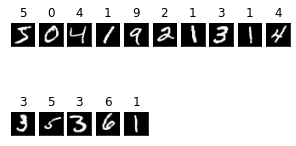

In [ ]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
  ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])

In [ ]:
# determine the shape of the input images
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [ ]:
#defining the model
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

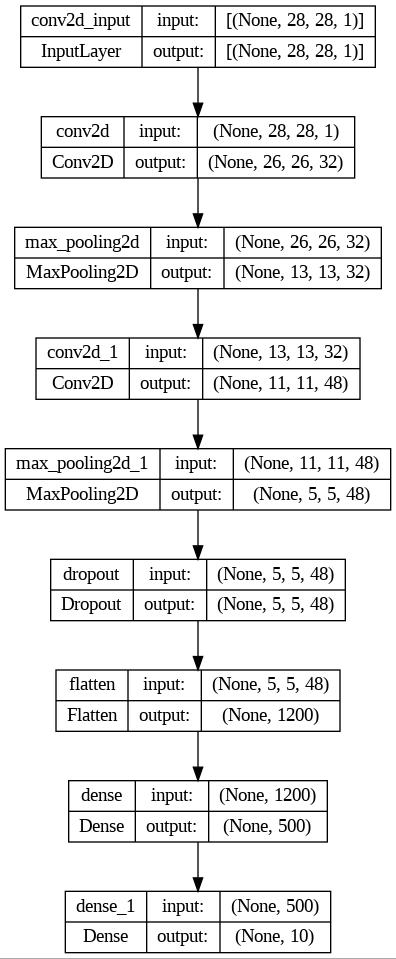

In [ ]:
plot_model(model,'model.jpg',show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

x = model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 54s - loss: 1.0701 - accuracy: 0.8828 - val_loss: 0.0821 - val_accuracy: 0.9742 - 54s/epoch - 127ms/step
Epoch 2/10
422/422 - 52s - loss: 0.1604 - accuracy: 0.9512 - val_loss: 0.0585 - val_accuracy: 0.9828 - 52s/epoch - 123ms/step
Epoch 3/10
422/422 - 45s - loss: 0.1215 - accuracy: 0.9629 - val_loss: 0.0447 - val_accuracy: 0.9855 - 45s/epoch - 106ms/step
Epoch 4/10
422/422 - 52s - loss: 0.0962 - accuracy: 0.9697 - val_loss: 0.0437 - val_accuracy: 0.9877 - 52s/epoch - 124ms/step
Epoch 5/10
422/422 - 69s - loss: 0.0788 - accuracy: 0.9753 - val_loss: 0.0373 - val_accuracy: 0.9898 - 69s/epoch - 163ms/step
Epoch 6/10
422/422 - 67s - loss: 0.0688 - accuracy: 0.9781 - val_loss: 0.0402 - val_accuracy: 0.9895 - 67s/epoch - 159ms/step
Epoch 7/10
422/422 - 56s - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.0383 - val_accuracy: 0.9883 - 56s/epoch - 133ms/step
Epoch 8/10
422/422 - 46s - loss: 0.0548 - accuracy: 0.9823 - val_loss: 0.0423 - val_accuracy: 0.9895 - 46s/epoch - 110

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 98.68999719619751


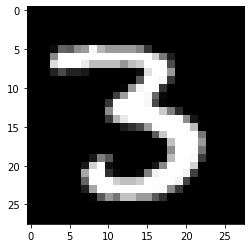

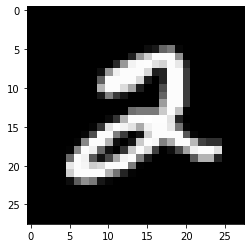

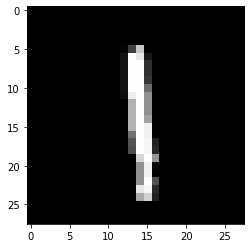

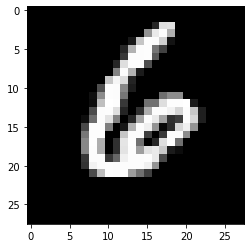

In [ ]:
image1 = x_train[12]
image2 = x_train[5]
image3 = x_train[8]
image4 = x_train[13]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image1),cmap='gray')
plt.show()
plt.imshow(np.squeeze(image2),cmap='gray')
plt.show()
plt.imshow(np.squeeze(image3),cmap='gray')
plt.show()
plt.imshow(np.squeeze(image4),cmap='gray')
plt.show()

In [ ]:
image1 = image1.reshape(1,image1.shape[0],image1.shape[1],image1.shape[2])
p = model.predict([image1])
print('Predicted: {}'.format(argmax(p)))
image2 = image2.reshape(1,image2.shape[0],image2.shape[1],image2.shape[2])
p = model.predict([image2])
print('Predicted: {}'.format(argmax(p)))
image3 = image3.reshape(1,image3.shape[0],image3.shape[1],image3.shape[2])
p = model.predict([image3])
print('Predicted: {}'.format(argmax(p)))
image4 = image4.reshape(1,image4.shape[0],image4.shape[1],image4.shape[2])
p = model.predict([image4])
print('Predicted: {}'.format(argmax(p)))

1/1 [==============================] - 0s 33ms/step
Predicted: 3
1/1 [==============================] - 0s 38ms/step
Predicted: 2
1/1 [==============================] - 0s 33ms/step
Predicted: 1
1/1 [==============================] - 0s 31ms/step
Predicted: 6
